In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt



def get_attack_interval(label):
    starts = []
    ends = []

    for i in range(len(label) - 1):
        if (label[i] == 0 and label[i + 1] == 1):
            starts.append(i + 1)
        if (label[i] == 1 and label[i + 1] == 0):
            ends.append(i + 1)
    int_num = np.min((len(starts), len(ends)))
    return np.concatenate((starts[:int_num], ends[:int_num])).reshape(2, int_num).transpose(1, 0)
attack_level = np.load('../../data/wadi/attack_level.npy')
attack_interval = get_attack_interval(attack_level)

os.listdir()

['a.npy',
 'bnaf.py',
 'run_mdi.sh',
 'optim',
 'cai_eval2.py',
 'region_proposals_wadi_nonbnaf_gaussian_globalcov.npy',
 'cai_maxdiv.py',
 'visualize.ipynb',
 'eval_label.py',
 'b.npy',
 'bnaf_mdi_20191001.zip',
 'tensorboard',
 'cai_maxdiv_1001.py',
 'checkpoint_path.txt',
 'run_bnaf.sh',
 'readme.md',
 '.ipynb_checkpoints',
 'cov_0.npy',
 'cai_maxdiv_orig.py',
 'cai_eval.py',
 'anomaly_estimation.py',
 '__pycache__',
 'maxdiv_util.py',
 'cai',
 'cov.npy']

In [ ]:
# handle scores ..

In [197]:
scores = np.load('region_proposals_wadi_nonbnaf_gaussian_globalcov.npy')

In [198]:
score_dir = {}

In [199]:
int_sizes = np.unique(scores[:,1]-scores[:,0])

In [200]:
int_sizes

array([  29.,   37.,   46.,   58.,   72.,   90.,  113.,  140.,  175.,
        219.,  273.,  341.,  425.,  530.,  662.,  826., 1030., 1285.,
       1603., 2000.])

In [201]:
for int_size in int_sizes:
    score_dir[int_size] = (scores[:,1]-scores[:,0])==int_size

In [203]:
def get_attack_interval(label):
    starts = []
    ends = []

    for i in range(len(label) - 1):
        if (label[i] == 0 and label[i + 1] == 1):
            starts.append(i + 1)
        if (label[i] == 1 and label[i + 1] == 0):
            ends.append(i + 1)
    int_num = np.min((len(starts), len(ends)))
    return np.concatenate((starts[:int_num], ends[:int_num])).reshape(2, int_num).transpose(1, 0)
attack_level = np.load('../../data/wadi/attack_level.npy')
attack_interval = get_attack_interval(attack_level)

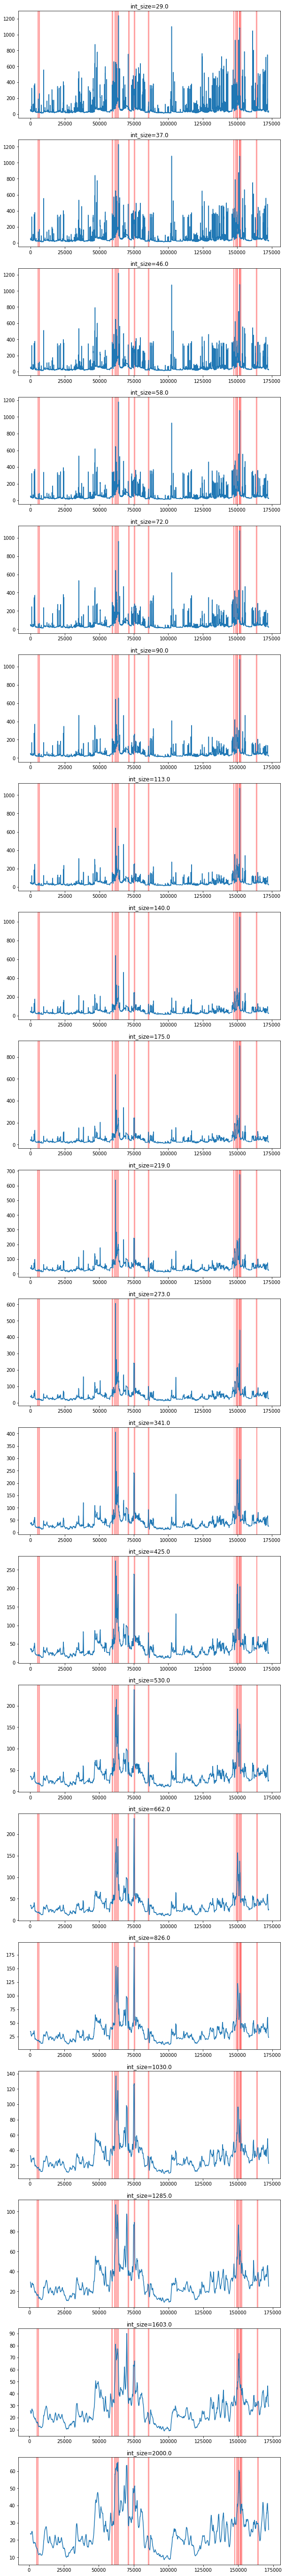

In [204]:
len_int = len(int_sizes)
plt.figure(figsize=(10,5*len_int))
for i, int_size in enumerate(int_sizes):
    plt.subplot(len_int,1, i+1)
    plt.title("int_size="+str(int_size))
    plt.plot(scores[score_dir[int_size],0]+int_size/2, scores[score_dir[int_size],2])
    for j in range(len(attack_interval)):
        plt.axvspan(attack_interval[j][0], attack_interval[j][1], alpha=0.3, color="red")

In [20]:
import time

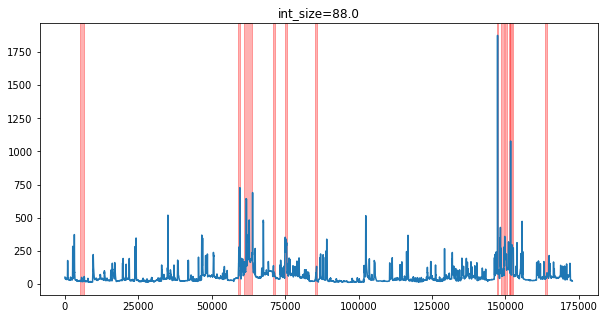

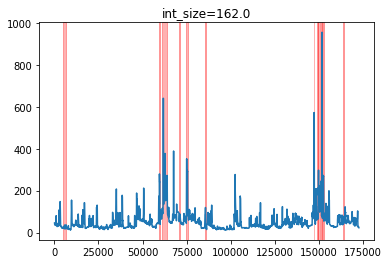

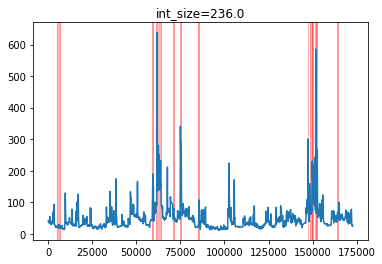

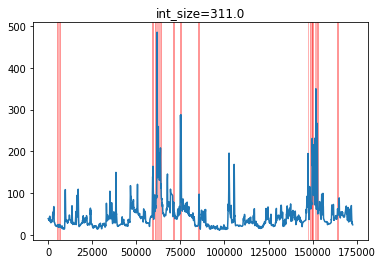

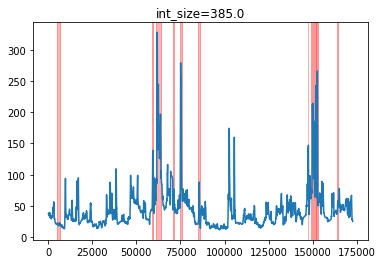

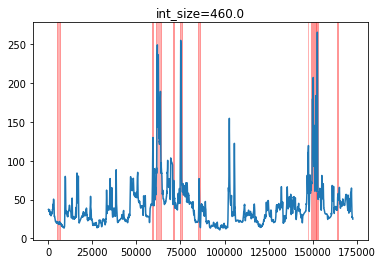

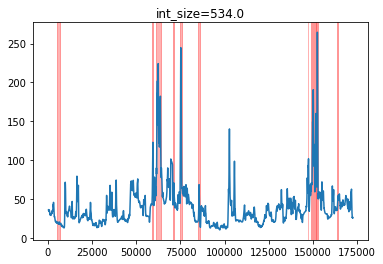

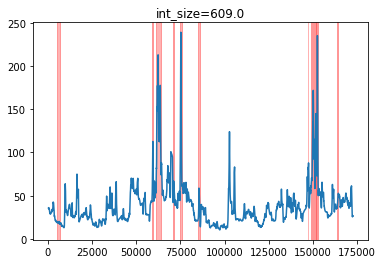

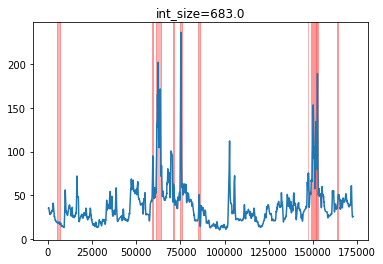

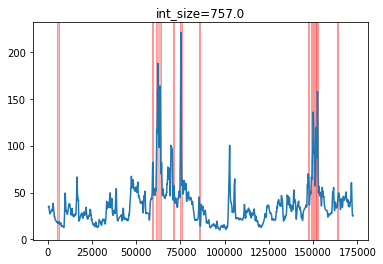

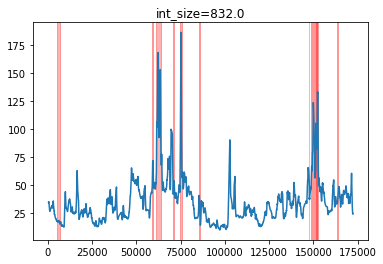

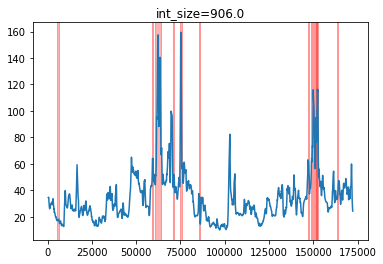

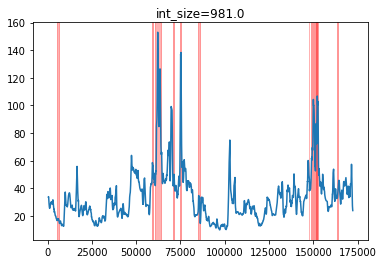

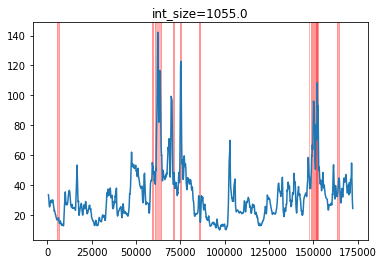

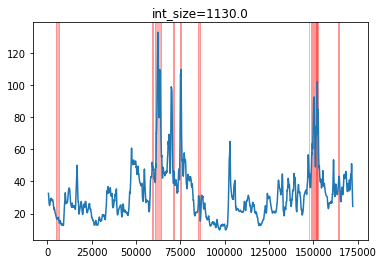

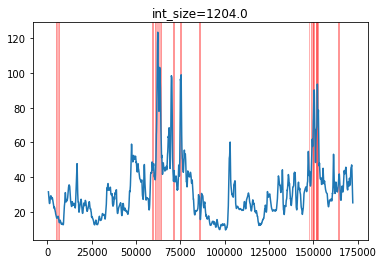

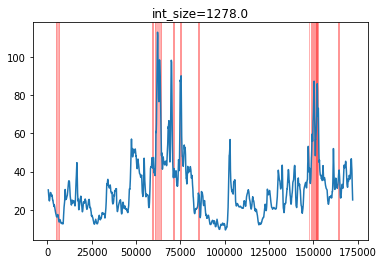

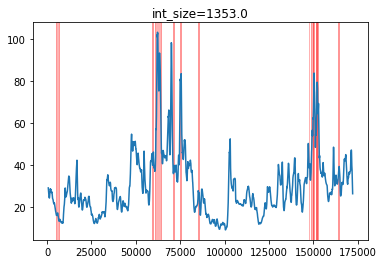

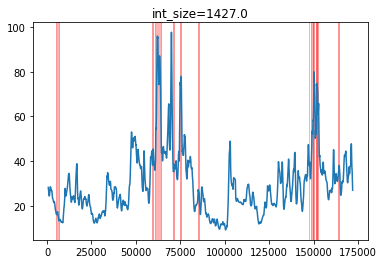

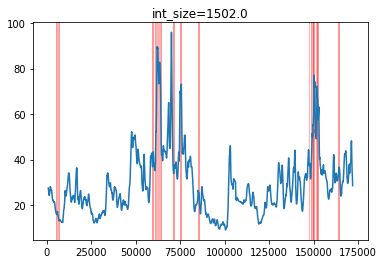

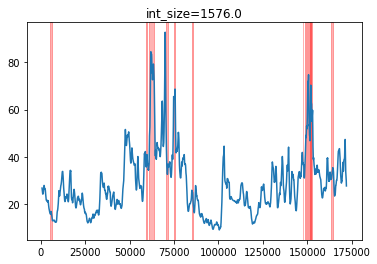

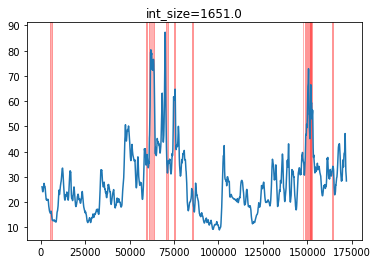

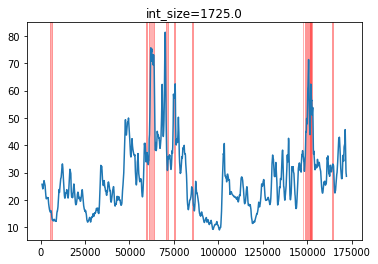

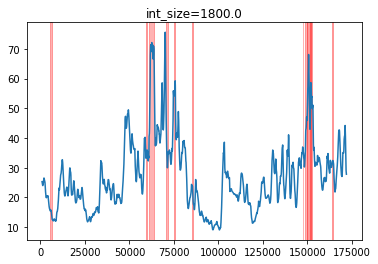

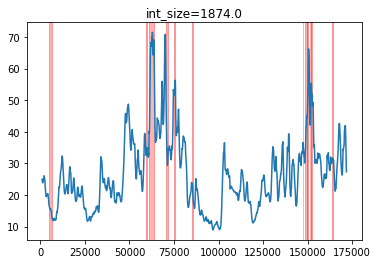

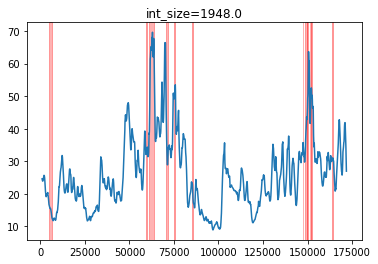

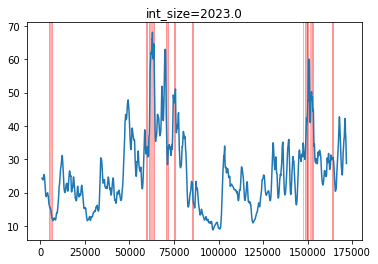

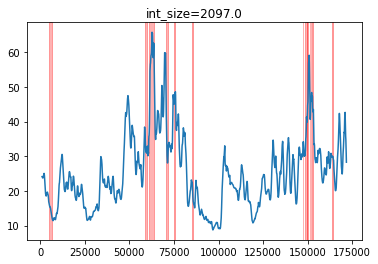

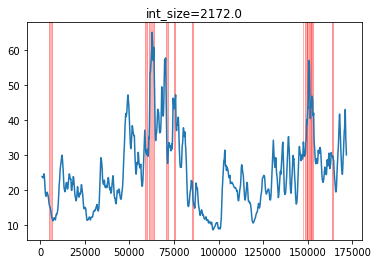

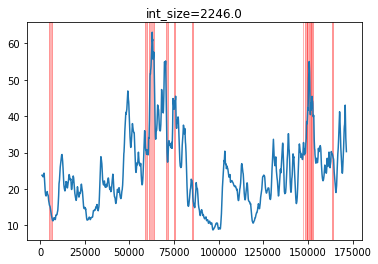

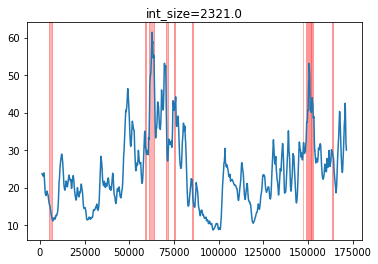

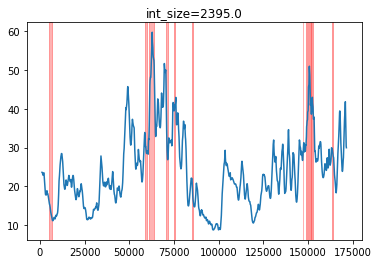

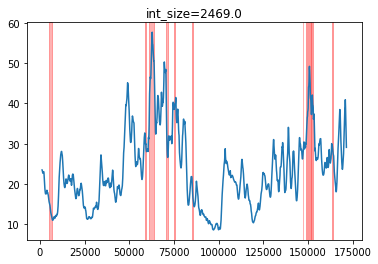

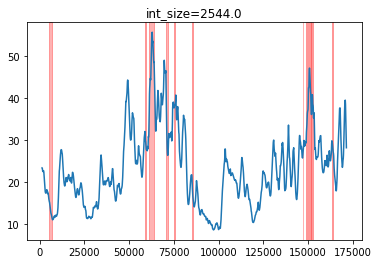

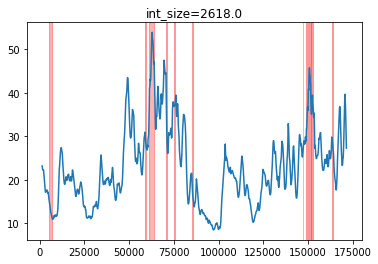

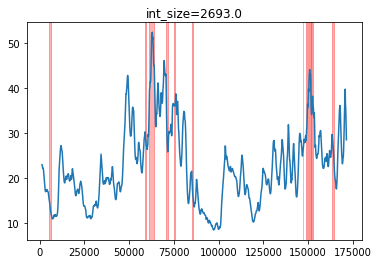

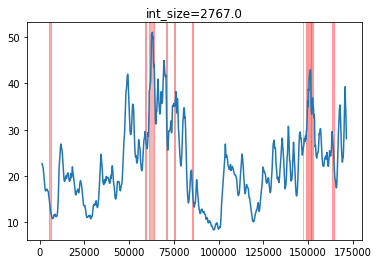

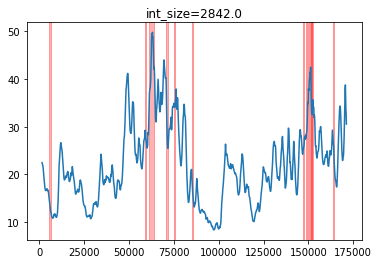

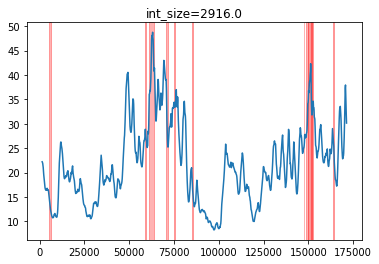

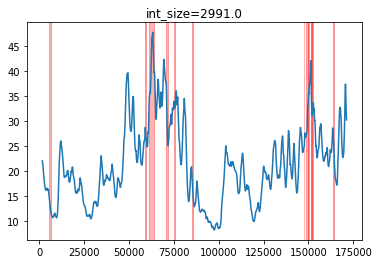

In [23]:
len_int = len(int_sizes)
plt.figure(figsize=(10,5))
for i, int_size in enumerate(int_sizes):
    #plt.subplot(len_int,1, i+1)
    plt.title("int_size="+str(int_size))
    plt.plot(scores[score_dir[int_size],0]+int_size/2, scores[score_dir[int_size],2])
    for j in range(len(attack_interval)):
        plt.axvspan(attack_interval[j][0], attack_interval[j][1], alpha=0.3, color="red")
    plt.show()
    time.sleep(0.3)
    plt.close()

array([0, 0, 0])

In [191]:
for int_size in int_sizes:
    index = score_dir[int_size]
    new_index = scores[index,2] > np.quantile(scores[index,2], 0.8)
    index_index = np.array([i for i in range(len(index)) if index[i]]).astype(int)
    score_dir[int_size] = index_index[new_index]

In [192]:
vals_dic = {}

In [193]:
for int_size in int_sizes:
    vals_dic[int_size] = scores[score_dir[int_size]]

In [194]:
val_sum = np.zeros(len(attack_level))
val_w = np.zeros(len(attack_level))

In [195]:
for int_size in int_sizes[np.arange(0, len(int_sizes))]:
    #print(int_size)
    for val in vals_dic[int_size]:
        start = int(val[0])
        end = int(val[1])
        val_sum[start:end] += val[2]/np.power(int_size, 0.9)
        val_w[start:end] += 1
np.corrcoef(val_sum, attack_level)[0][1]

0.4506521657990812

In [136]:
val_w += 1e-10

In [196]:
np.save('b.npy', val_sum)

In [59]:
a = np.random.random(50).reshape(5,10)

In [60]:
a

array([[0.68666988, 0.48355164, 0.13283281, 0.18648258, 0.89343592,
        0.29351276, 0.84469009, 0.73494104, 0.28265285, 0.55418942],
       [0.54897417, 0.6777356 , 0.87084441, 0.78769081, 0.78357437,
        0.99701507, 0.8826742 , 0.50100683, 0.17614927, 0.01340029],
       [0.78997752, 0.10436078, 0.58283103, 0.78967324, 0.93595023,
        0.51989132, 0.49217191, 0.12550177, 0.21248157, 0.65512072],
       [0.49560818, 0.28989582, 0.96901279, 0.46651727, 0.02987259,
        0.2468807 , 0.08978356, 0.97630223, 0.48900023, 0.17826852],
       [0.13178267, 0.58206784, 0.32890706, 0.64883434, 0.73694203,
        0.94646393, 0.97386581, 0.23230362, 0.74710894, 0.42835134]])

In [61]:
mask = a[:,0]>0.5

In [64]:
mask = np.concatenate(tuple([mask.reshape(5,1) for i in range(10)]), axis=1)

In [65]:
np.ma.masked_array(a, mask)

masked_array(
  data=[[--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [0.495608179856627, 0.2898958198087408, 0.9690127895053995,
         0.4665172703948922, 0.02987258564001316, 0.24688069677819868,
         0.08978356489608974, 0.9763022295259137, 0.48900023142747195,
         0.17826852373308288],
        [0.13178266541674344, 0.5820678378489764, 0.3289070638224443,
         0.6488343394215476, 0.7369420302430327, 0.9464639310415774,
         0.9738658124739782, 0.23230362199972843, 0.7471089448169352,
         0.4283513412149256]],
  mask=[[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [False, False, False, False, False, False, False, False, False,
         False],

In [66]:
from scipy.linalg import cho_factor, cho_solve

In [92]:
a = np.array([[1,0,0],
              [1,1,0],
              [1,1,1]])
b = np.array([[1,1,0],
              [0,1,1],
              [0,0,1]])
d = np.matmul(a, a.T)
d

array([[1, 1, 1],
       [1, 2, 2],
       [1, 2, 3]])

In [93]:
c, low = cho_factor(d)

In [94]:
print(c)
print(d)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 2. 1.]]
[[1 1 1]
 [1 2 2]
 [1 2 3]]


In [95]:
low

False

In [96]:
b = np.array([1,2,3])

In [97]:
x = cho_solve((c,low), b)
x

array([0., 0., 1.])

In [98]:
np.matmul(d, x)

array([1., 2., 3.])

In [99]:
c.T.dot(c)

array([[3., 4., 3.],
       [4., 6., 4.],
       [3., 4., 3.]])

In [120]:
os.listdir()

['a.npy',
 'bnaf.py',
 'run_mdi.sh',
 'optim',
 'cai_eval2.py',
 'region_proposals_wadi_nonbnaf_gaussian_globalcov.npy',
 'cai_maxdiv.py',
 'visualize.ipynb',
 'eval_label.py',
 'b.npy',
 'tensorboard',
 'checkpoint_path.txt',
 'run_bnaf.sh',
 'readme.md',
 '.ipynb_checkpoints',
 'cov_0.npy',
 'cai_eval.py',
 'anomaly_estimation.py',
 '__pycache__',
 'maxdiv_util.py',
 'cai',
 'cov.npy']

In [121]:
cov = np.load('cov.npy')
cov0 = np.load('cov_0.npy')

In [123]:
cov.shape, cov0.shape

((96, 96), (96, 96))

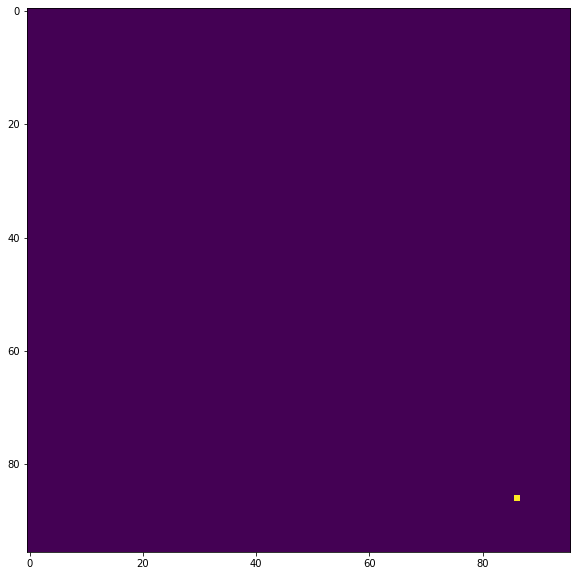

In [124]:
plt.figure(figsize = (20,10))
plt.imshow(cov0)

In [5]:
data = np.load('../../data/wadi/anomaly_np5.npy')

In [6]:
data.shape

(172801, 97)

In [8]:
data_status = np.load('../../data/wadi/anomaly_status.npy')

In [9]:
data_status.shape

(172801, 17)

In [10]:
data_continuous = np.load('../../data/wadi/anomaly_continuous.npy')
data_continuous.shape

(172801, 81)

In [13]:
data_np3 = np.load('../../data/wadi/anomaly_np3.npy')
data_np3.shape

(172801, 97)

In [16]:
def get_c(data_continuous):
    maxs = np.max(data_continuous, axis=0)
    mins=np.min(data_continuous, axis=0)
    c = [i for i in range(data_continuous.shape[1]) if maxs[i]==mins[i]]
    return c

In [17]:
get_c(data)

[]

In [18]:
np.max(data_continuous[:,-1])

1.0309734513274338

In [21]:
def comp_ij(data, data_continuous, i,j):
    return np.mean(data[:,i]==data_continuous[:,j])==1

In [24]:
status_idx = []
for i in range(data.shape[1]):
    for j in range(data_continuous.shape[1]):
        if comp_ij(data, data_continuous, i,j):
            print("data[{}]=data_continuous[{}]".format(i,j))
    for j in range(data_status.shape[1]):
        if comp_ij(data, data_status, i,j):
            print("data[{}]=data_status[{}]".format(i,j))
            status_idx.append(i)

data[0]=data_continuous[0]
data[1]=data_continuous[1]
data[2]=data_continuous[2]
data[3]=data_continuous[3]
data[4]=data_continuous[4]
data[5]=data_continuous[5]
data[6]=data_continuous[6]
data[7]=data_status[0]
data[8]=data_status[1]
data[9]=data_status[2]
data[10]=data_status[3]
data[11]=data_status[4]
data[12]=data_status[5]
data[13]=data_status[6]
data[14]=data_status[7]
data[15]=data_continuous[7]
data[16]=data_continuous[8]
data[17]=data_continuous[9]
data[18]=data_continuous[10]
data[19]=data_continuous[11]
data[20]=data_continuous[12]
data[21]=data_continuous[13]
data[22]=data_continuous[14]
data[23]=data_continuous[15]
data[24]=data_continuous[16]
data[25]=data_continuous[17]
data[26]=data_continuous[18]
data[27]=data_continuous[19]
data[28]=data_continuous[20]
data[29]=data_continuous[21]
data[30]=data_continuous[22]
data[31]=data_continuous[23]
data[32]=data_continuous[24]
data[33]=data_continuous[25]
data[34]=data_continuous[26]
data[35]=data_continuous[27]
data[36]=data_co

In [25]:
non_status_idx = [i for i in range(data.shape[1]) if i not in status_idx]

In [26]:
data_continuous = data[:, non_status_idx]

In [27]:
np.save('../../data/wadi/anomaly_continuous.npy', data_continuous)

In [28]:
from scipy.interpolate import interp1d

In [43]:
keep_index = np.arange(0,data.shape[0],5)

In [44]:
keep_index

array([     0,      5,     10, ..., 172790, 172795, 172800])

In [45]:
data_keep = data[keep_index, :]
data_keep.shape

(34561, 97)

In [46]:
np.save('../../data/wadi/anomaly_np1_5.npy', data_keep)

In [47]:
np.save('../../data/wadi/attack_level1_5.npy', attack_level[keep_index])

In [37]:
np.outer([1,2,3],[1,2,3])

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [38]:
a = np.random.random(15).reshape(5,3)

In [42]:
np.outer(a,a, axis=1).shape

TypeError: outer() got an unexpected keyword argument 'axis'